reading the dataset

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/Train.csv', header=0)

Column descriptions:

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the
particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
variable to be predicted.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


before exploring the data we'll need to split it into test and train. the current train set is created to be used to train and test models hence we'll need to split the data in a stratified manner so that the distribution of the label values is bell-shaped in both *train* and *test* sets.

the value by which we stratify is Item price. reason behind it: i cheated and looked that it has the highest correlation with the target value. this doesn't feel like a good enough reason, in which case we can always go back and experiment with the way we split the dataset

In [4]:
# creating price category by which we will split the dataset

data['Item_MRP_cat'] = pd.cut(data['Item_MRP'], bins=[0., 50, 100, 175, 225, np.inf], labels=[1, 2, 3, 4, 5])

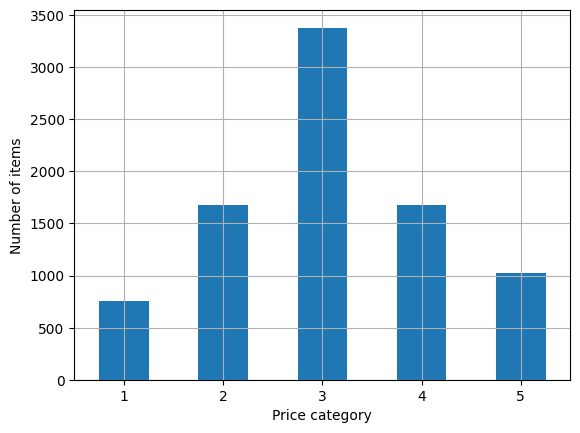

In [5]:
data['Item_MRP_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Price category')
plt.ylabel('Number of items')
plt.show()

In [6]:
# using 'Item_MRP_cat' as stratify parameter 

from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, stratify=data['Item_MRP_cat'], random_state=42)

In [7]:
# checking the proportions of the statify parameter in train set

# strat_train_set['Item_MRP_cat'].value_counts()/len(strat_train_set)
strat_test_set['Item_MRP_cat'].value_counts()/len(strat_test_set)

Item_MRP_cat
3    0.396481
2    0.197654
4    0.197067
5    0.120235
1    0.088563
Name: count, dtype: float64

In [8]:
# we won't use this MRP_cat column again so might as well remove it

for set_ in (strat_test_set, strat_train_set):
    set_.drop("Item_MRP_cat", axis=1, inplace=True)

============================================

copying the train set and ready to explore! forget about the test set for now

In [9]:
sales = strat_train_set.copy()

### Exploration

In [10]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6722,FDT37,14.150,Low Fat,0.000000,Canned,253.7014,OUT045,2002,NaN,Tier 2,Supermarket Type1,5865.0322
4885,FDE14,13.650,Regular,0.031509,Canned,98.7700,OUT045,2002,NaN,Tier 2,Supermarket Type1,1697.7900
3061,FDH26,19.250,Regular,0.034693,Canned,140.1496,OUT035,2004,Small,Tier 2,Supermarket Type1,1552.6456
5519,FDE36,5.260,Regular,0.041943,Baking Goods,165.4868,OUT018,2009,Medium,Tier 3,Supermarket Type2,2293.0152
1099,FDL33,7.235,Low Fat,0.099963,Snack Foods,193.8452,OUT046,1997,Small,Tier 1,Supermarket Type1,1957.4520


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 6722 to 4357
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5636 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4895 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 692.5+ KB


In [12]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1182
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1923
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

So we have 1182 item weights missing, and 1923 outlet_size records missing. looks like Outlet_size repeats itself according to Outlet_identifier, so i'll need to check if we have outlet_size mentioned for the outlet identifiers and will just replace NaN's with it. As for the item_weight, i'll need to check if it's related to item identifier and check if there are records with that weight not missing. if smth goes wrong i'll just replace the NaN's with median value. 

In [13]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4098
Regular    2303
LF          246
low fat      86
reg          85
Name: count, dtype: int64

Item_Fat_Content column holds categorical values that should be unified into two categories: Low Fat & Regular; this could be converted to numbers using ordinary encoder. 

In [14]:
sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    989
Snack Foods              946
Household                737
Frozen Foods             698
Dairy                    544
Baking Goods             520
Canned                   515
Health and Hygiene       416
Soft Drinks              353
Meat                     344
Breads                   198
Hard Drinks              171
Others                   134
Starchy Foods            119
Breakfast                 87
Seafood                   47
Name: count, dtype: int64

we have 16 Item_Type categories - this one needs to be encoded using one-hot encoder

In [15]:
sales['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    762
OUT046    753
OUT049    750
OUT045    749
OUT035    739
OUT013    738
OUT017    735
OUT018    733
OUT010    439
OUT019    420
Name: count, dtype: int64

Can identifier be a category? i would doubt, we might need to remove this column

In [16]:
sales[sales['Outlet_Size'].isna()]['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    749
OUT017    735
OUT010    439
Name: count, dtype: int64

it looks like the outlets above have no outlet sizes across all of their records. i will fill in the NaN values with most frequent value in Outlet_Size. 

In [17]:
sales['Outlet_Size'].value_counts()

Outlet_Size
Medium    2245
Small     1912
High       738
Name: count, dtype: int64

Outlet_size will be converted using ordinary encoder

In [18]:
sales['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2672
Tier 2    2223
Tier 1    1923
Name: count, dtype: int64

there seems to be no explanation about the outlet location tiers except the following:

*Outlet_Location_Type: The type of city in which the store is located*

Because of that we can't determine if Tier 1 is better or worse than Tier 3, hence we'll need one-hot encoder

<font color=red> **UPDATE**</font> Tier 1-3 go from smaller to bigger. Tier 1 - Plymouth, Tier 2 - Bristol, Tier 3 - London
Hence we can apply <font color=green>Ordinal Encoder</font>

In [19]:
sales['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    4464
Grocery Store         859
Supermarket Type3     762
Supermarket Type2     733
Name: count, dtype: int64

outlet type will also be encoded using 1-hot encoding
 
<font color=red>**UPDATE**</font> outlet types also grow from Grocery Store to Supermarket Type 1-3. grocery store < super type 1 < type 2 < type 3
using <font color=green>Ordinal Encoder</font> instead

--------------------------------------------------------------------
i need to plot my values to see if there's any correlation

In [20]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5636.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.867190,0.066047,140.888391,1997.797741,2188.773263
std,4.653099,0.051516,62.295271,8.365777,1703.980443
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.767500,0.026988,93.817950,1987.000000,844.900200
50%,12.625000,0.053864,142.731200,1999.000000,1805.649600
75%,16.850000,0.094697,185.782550,2004.000000,3103.293800
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
from pandas.plotting import scatter_matrix

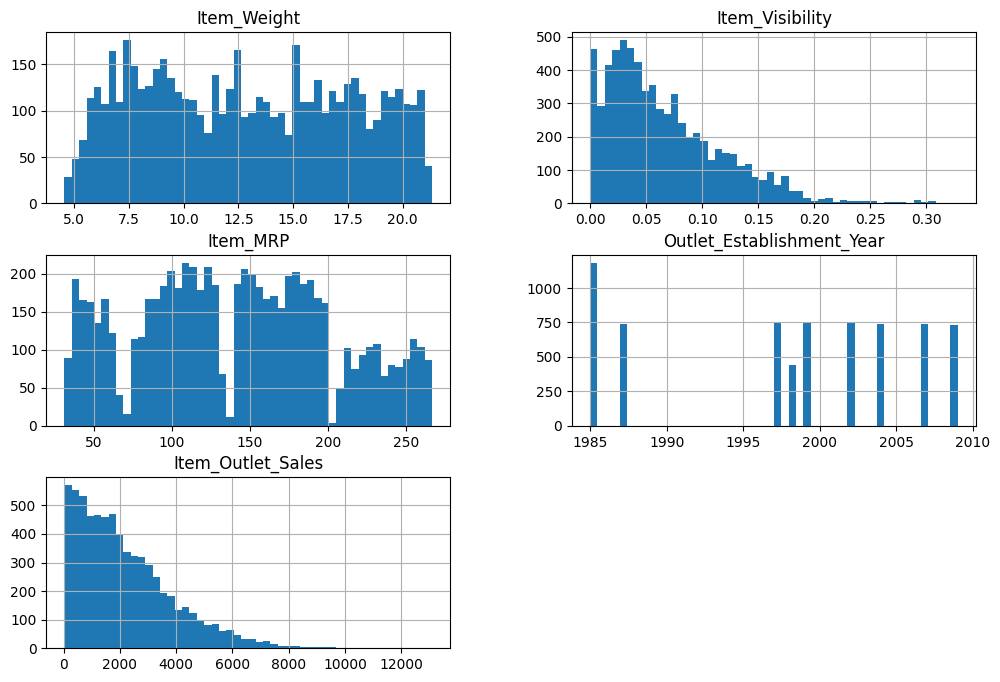

In [22]:
sales.hist(bins = 50, figsize=(12, 8))
plt.show()

These features are distributed a bit weirdly. We'll need to transform these values to make them more bell-shaped (normal distribution)

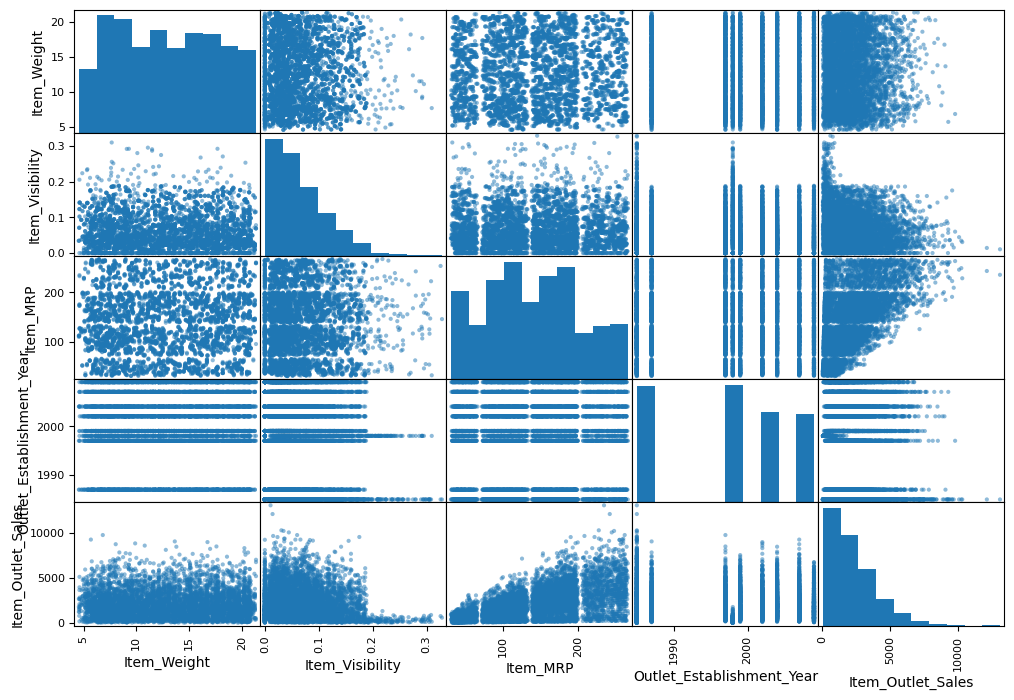

In [23]:

attributes = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

scatter_matrix(sales[attributes], figsize=(12, 8))
plt.show()

In [24]:
corr_matrix = sales[attributes].corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567897
Item_Weight                  0.017697
Outlet_Establishment_Year   -0.041987
Item_Visibility             -0.133831
Name: Item_Outlet_Sales, dtype: float64

*Item_MRP: Maximum Retail Price (list price) of the product*

has the highest correlation 0.567, the rest has very weak correlation. 

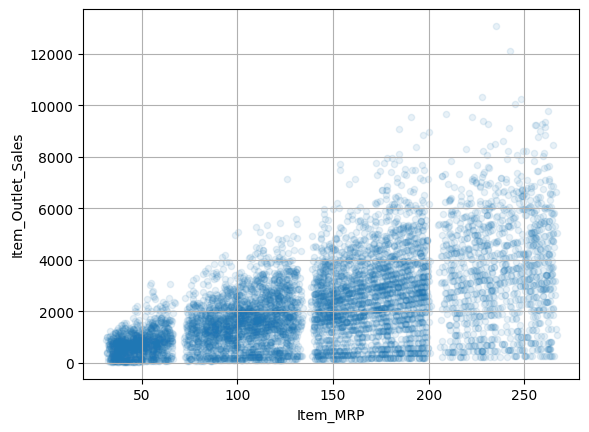

In [25]:
sales.plot(kind='scatter', x='Item_MRP', y = 'Item_Outlet_Sales', alpha=0.1, grid=True)
plt.show()

there seems to be a twisted trend going on: the higher MRP the more the item will sale in stores

### Data preparation

Before building the pipelines i'll be going through each column individually to decide what needs to be done with it

In [26]:
# separating Xs from Ys in the training dataset 

sales_x = sales.drop("Item_Outlet_Sales", axis=1)
sales_labels = sales['Item_Outlet_Sales'].copy()

In [27]:
# initialising Imputers for median and most_frequent strategy

from sklearn.impute import SimpleImputer
imputer_median = SimpleImputer(strategy = "median")
imputer_freq = SimpleImputer(strategy = "most_frequent")

In [28]:
sales_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 6722 to 4357
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5636 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4895 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


#### Imputers stage

In [29]:
# replacing Null values - with median for Item_Weight and with most frequent for Outlet_size

# starting with selecting numeric columns 
sales_num = sales_x.select_dtypes(include=[np.number])
imputer_median.fit(sales_num)

SimpleImputer(strategy='median')

In [30]:
X = imputer_median.transform(sales_num)

In [31]:
sales_tr = pd.DataFrame(X, columns=sales_num.columns, index=sales_num.index)
sales_tr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
6722,14.150,0.000000,253.7014,2002.0
4885,13.650,0.031509,98.7700,2002.0
3061,19.250,0.034693,140.1496,2004.0
5519,5.260,0.041943,165.4868,2009.0
1099,7.235,0.099963,193.8452,1997.0
...,...,...,...,...
5768,11.395,0.021602,149.1708,2004.0
5330,16.200,0.105498,101.4700,1998.0
3910,12.625,0.096592,117.4492,1985.0
6586,18.100,0.022526,95.0094,2007.0


In [32]:
sales_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 6722 to 4357
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6818 non-null   float64
 1   Item_Visibility            6818 non-null   float64
 2   Item_MRP                   6818 non-null   float64
 3   Outlet_Establishment_Year  6818 non-null   float64
dtypes: float64(4)
memory usage: 266.3 KB


moving on to with categorical values

In [33]:
# first separating categorical values - the ones that are not numeric

sales_cat = sales_x.loc[:, ~sales_x.columns.isin(sales_num.columns)]

In [34]:
# finding NAs
sales_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1923
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [35]:
# fitting the imputer with most_frequent strategy on categorical dataset

imputer_freq.fit(sales_cat)

SimpleImputer(strategy='most_frequent')

imputer to replace missing values with most frequent ones

In [36]:
cat_x = imputer_freq.transform(sales_cat)

In [37]:
sales_cat_tr = pd.DataFrame(cat_x, columns=sales_cat.columns, index=sales_cat.index)
sales_cat_tr

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
6722,FDT37,Low Fat,Canned,OUT045,Medium,Tier 2,Supermarket Type1
4885,FDE14,Regular,Canned,OUT045,Medium,Tier 2,Supermarket Type1
3061,FDH26,Regular,Canned,OUT035,Small,Tier 2,Supermarket Type1
5519,FDE36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
1099,FDL33,Low Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...
5768,NCQ05,LF,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
5330,FDX37,Low Fat,Canned,OUT010,Medium,Tier 3,Grocery Store
3910,NCX05,Low Fat,Health and Hygiene,OUT027,Medium,Tier 3,Supermarket Type3
6586,FDD57,Low Fat,Fruits and Vegetables,OUT017,Medium,Tier 2,Supermarket Type1


In [38]:
sales_cat_tr.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
6722,FDT37,Low Fat,Canned,OUT045,Medium,Tier 2,Supermarket Type1
4885,FDE14,Regular,Canned,OUT045,Medium,Tier 2,Supermarket Type1
3061,FDH26,Regular,Canned,OUT035,Small,Tier 2,Supermarket Type1
5519,FDE36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
1099,FDL33,Low Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1


#### Encoders for categorical values

In [39]:
# initialising encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

In [40]:
sales_cat_tr['Item_Fat_Content'].replace({"LF": 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace=True)

In [41]:
sales_cat_tr['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    4430
Regular    2388
Name: count, dtype: int64

With different categorical columns we'll need to apply different encoders. 

- Item_Identifier - can we drop it? 
- Item_Fat_Content - OrdinalEncoder
- Item_Type - OneHotEncoder (unfortunately)
- Outlet_Identifier - can we drop it?
- Outlet_Size = OrdinalEncoder
- Outlet_Location_Type = OrdinalEncoder
- Outlet_Type = OrdinalEncoder

In [42]:
# REWRITE the code below to separate the cat df from identifiers - we'll just drop them later

# id_cols = ['Item_Identifier', 'Outlet_Identifier']

# sales_cat = sales_x.loc[:, ~sales_x.columns.isin(sales_num.columns)]

ordinal_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

test = ordinal_encoder.fit_transform(sales_cat_tr[ordinal_cols])

In [43]:
test[:5]

array([[0., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 2., 1., 1.],
       [1., 1., 2., 2.],
       [0., 2., 0., 1.]])

In [44]:
sales_cat_tr[ordinal_cols].head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
6722,Low Fat,Medium,Tier 2,Supermarket Type1
4885,Regular,Medium,Tier 2,Supermarket Type1
3061,Regular,Small,Tier 2,Supermarket Type1
5519,Regular,Medium,Tier 3,Supermarket Type2
1099,Low Fat,Small,Tier 1,Supermarket Type1


so from the categories and their numeric encoded values we can see that 

In [45]:
ordinal_encoder.get_feature_names_out()

array(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'], dtype=object)

applying ordinal encoder for categorical values (except 2 indexes and Item_Type - onehot)

In [46]:
pd.DataFrame(ordinal_encoder.fit_transform(sales_cat_tr[ordinal_cols]), columns=ordinal_encoder.get_feature_names_out(), index=sales_cat_tr[ordinal_cols].index)

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type
6722,0.0,1.0,1.0,1.0
4885,1.0,1.0,1.0,1.0
3061,1.0,2.0,1.0,1.0
5519,1.0,1.0,2.0,2.0
1099,0.0,2.0,0.0,1.0
...,...,...,...,...
5768,0.0,2.0,1.0,1.0
5330,0.0,1.0,2.0,0.0
3910,0.0,1.0,2.0,3.0
6586,0.0,1.0,1.0,1.0


OneHot encoder for Item_Type column

In [47]:
onehot_encoder.handle_unknown = "ignore"  # ignores any new category added in the future 

In [48]:
onehot_encoder.fit(np.reshape(sales_cat_tr['Item_Type'], (-1, 1)))  # this one col needs to be reshaped otherwise the encoder throws an error

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [49]:
onehot_encoder.categories_
# onehot_encoder.feature_names_in_  # is not working because there's no col name - since we reshaped the df column into a np.array (-1, 1)

[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]

In [50]:
pd.DataFrame(onehot_encoder.fit_transform(np.reshape(sales_cat_tr['Item_Type'], (-1, 1))), columns=onehot_encoder.get_feature_names_out(),
             index=sales_cat_tr['Item_Type'].index)  # presenting the result in the dataframe format

,x0_Baking Goods,x0_Breads,x0_Breakfast,x0_Canned,x0_Dairy,x0_Frozen Foods,x0_Fruits and Vegetables,x0_Hard Drinks,x0_Health and Hygiene,x0_Household,x0_Meat,x0_Others,x0_Seafood,x0_Snack Foods,x0_Soft Drinks,x0_Starchy Foods
6722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4885,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6586,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Numerical columns and their transformations

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

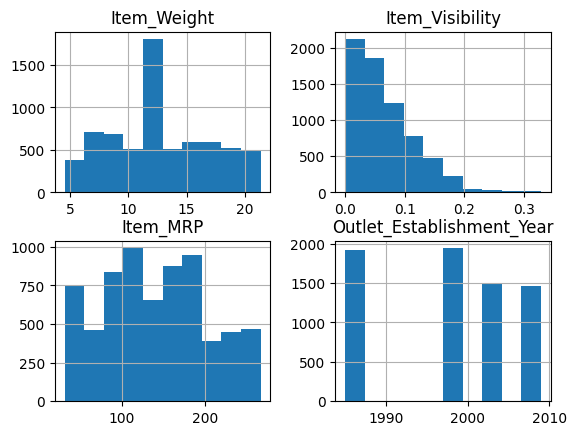

In [51]:
sales_tr.hist()

I'll go through each column and try to fix the distribution to Gaussian, starting with Item_Visibility which is the most intuitive

In [52]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(sales_num['Item_Visibility'])

c:\Users\tania\PythonProjects\store-sales-prediction\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
log_pop[log_pop==-np.inf]  # this transformer returned infinite numbers which is bad for us, so i'll try bucketising instead

6722   -inf
520    -inf
1118   -inf
7562   -inf
7349   -inf
       ... 
4206   -inf
6781   -inf
6069   -inf
5400   -inf
7495   -inf
Name: Item_Visibility, Length: 421, dtype: float64

In [54]:
sales_num.iloc[520, :]  # one of the products in the df, the item visibility is so low that the log of it returned np.inf 

Item_Weight                    16.00000
Item_Visibility                 0.07729
Item_MRP                       44.50860
Outlet_Establishment_Year    2007.00000
Name: 6555, dtype: float64

Trying power transformer, starting with yeo-johnson + standardise

c:\Users\tania\PythonProjects\store-sales-prediction\venv\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\tania\PythonProjects\store-sales-prediction\venv\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

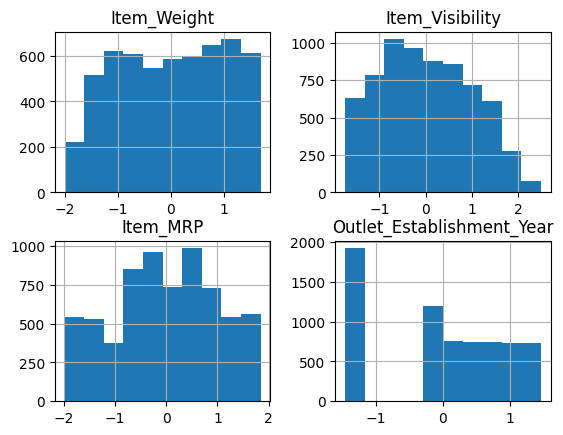

In [55]:
from sklearn.preprocessing import PowerTransformer

transformer_yj = PowerTransformer(method="yeo-johnson", standardize=True)
sales_num_trans = transformer_yj.fit_transform(sales_num)

result = pd.DataFrame(sales_num_trans, columns=transformer_yj.get_feature_names_out(), index=sales_num.index)
result.hist()

didn't do much, the distributions are still not uniform.

I shall try bucketising Item_Weight and Item_Visibility. 

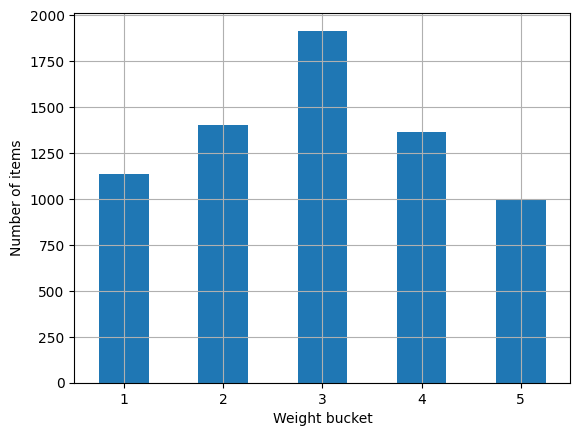

In [56]:
sales_test = sales_tr.copy()
sales_test['Item_Weight_bucket'] = pd.cut(sales_test['Item_Weight'], bins=[0., 8, 12, 14, 18, np.inf], labels=[1, 2, 3, 4, 5])

sales_test['Item_Weight_bucket'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Weight bucket')
plt.ylabel('Number of items')
plt.show()

In [58]:
np.array(sales_test['Item_Weight_bucket'])
sales_test['Item_Weight_bucket'] = sales_test['Item_Weight_bucket'].apply(lambda x: x/5)

array([4, 3, 5, ..., 3, 5, 2], dtype=int64)

Standardisation

In [61]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
sales_num_std_scaled = std_scaler.fit_transform(sales_tr)

In [62]:
test_df = pd.DataFrame(sales_num_std_scaled, columns=std_scaler.get_feature_names_out(), index=sales_num.index)

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>]],
      dtype=object)

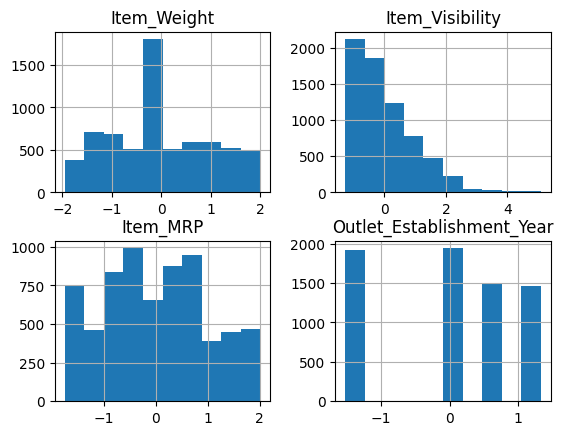

In [63]:
test_df.hist()